<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px;">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
    </div>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Advanced Time Series Techniques <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Applying LSTM for time series prediction</h3>
</div>

<div style="background-color: white; color: black; padding: 10px;">
    <h4><b>AGENDA</b> <p><p>
1.  Review of Time Series and Forecasting Techniques <p><p> 
2.   <p>
3.   <p>
4.   <p>  
</h4> </div>

<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100px; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    Be kind to someone today!
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->

</div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>1. Review of Time Series and Forecasting Techniques 
</h3> </div>

**1. ARIMA (AutoRegressive Integrated Moving Average):**
- **Purpose:** Models time series data with trends and seasonality.
- **Key Components:**
    - **AR (AutoRegressive):** Relies on past values.
    - **I (Integrated):** Differencing to make data stationary.
    - **MA (Moving Average):** Models residuals from past values.

- **When to Use:** For univariate time series with clear patterns and no irregular shocks.

**2. Exponential Smoothing:**
- **Purpose:** Models short-term trends and seasonality.
- **Types:**
    - **Simple Exponential Smoothing (SES):** For non-trending series.
    - **Holt’s Linear Trend Method** Accounts for trends.
    - **Holt-Winters Seasonal Method:** Adds seasonality handling.

- **When to Use:** When the data has a consistent pattern over time.

**3. Time Series Decomposition:**
- **Purpose:** Breaks down time series into:
    - **Trend:** Long-term movement.
    - **Seasonal:** Repeating patterns.
    - **Residual:** Irregular fluctuations.
- **When to Use:** To understand and visualize different components before modeling.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

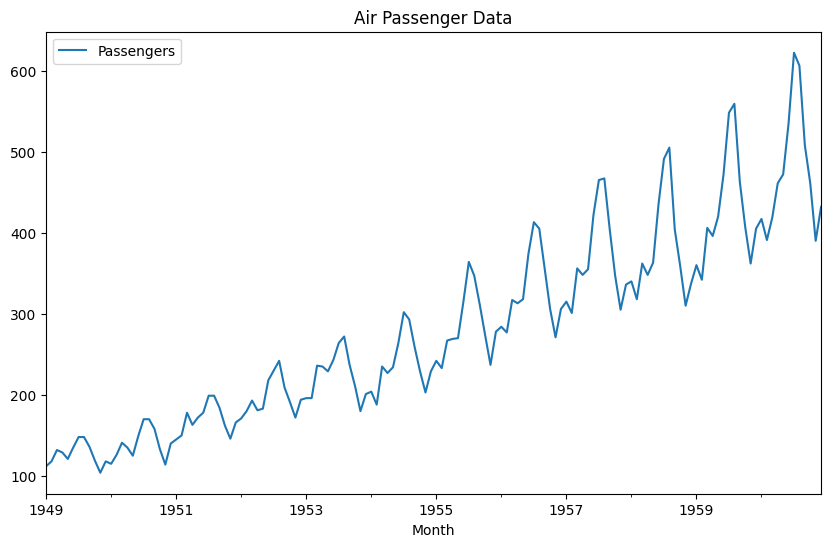

In [3]:
# Step 2: Visualize the original data
data.plot(title="Air Passenger Data", figsize=(10, 6))
plt.show()

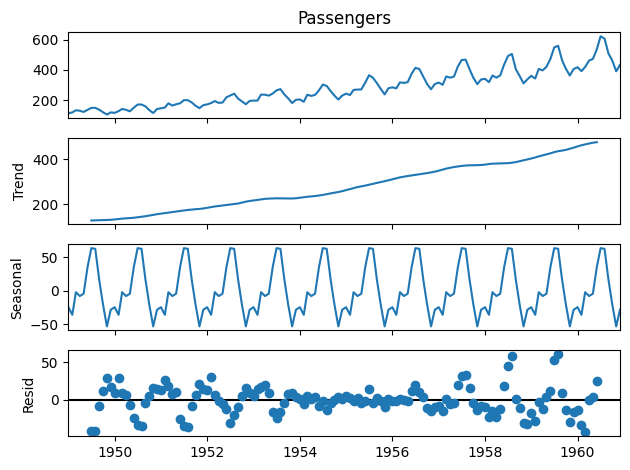

In [4]:
# Step 3: Perform time series decomposition to extract trend, seasonality, and residuals
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show()

In [5]:
# Step 4: Apply the ARIMA model for forecasting
# Define ARIMA parameters (p, d, q)
model_arima = ARIMA(data['Passengers'], order=(4, 1, 1))

# Fit the model
arima_result = model_arima.fit()

# Generate predictions using ARIMA
data['ARIMA_Predictions'] = arima_result.predict(start=1, end=len(data), dynamic=False)

# Forecast 12 months into the future
forecast_arima = arima_result.get_forecast(steps=12)
forecast_arima_index = pd.date_range(data.index[-1], periods=12, freq='MS')
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_ci = forecast_arima.conf_int()



c:\Users\devid\Desktop\xData-Analytix-Content-Prep\testenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\devid\Desktop\xData-Analytix-Content-Prep\testenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\devid\Desktop\xData-Analytix-Content-Prep\testenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
# Step 5: Apply Exponential Smoothing for forecasting
# Define the model with trend and seasonality
model_exp = ExponentialSmoothing(data['Passengers'], 
                                 trend='additive', 
                                 seasonal='additive', 
                                 seasonal_periods=12)

# Fit the model
exp_result = model_exp.fit()

# Generate fitted values for Exponential Smoothing
data['Exp_Smoothing'] = exp_result.fittedvalues

# Forecast 12 months into the future
forecast_exp = exp_result.forecast(steps=12)


c:\Users\devid\Desktop\xData-Analytix-Content-Prep\testenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


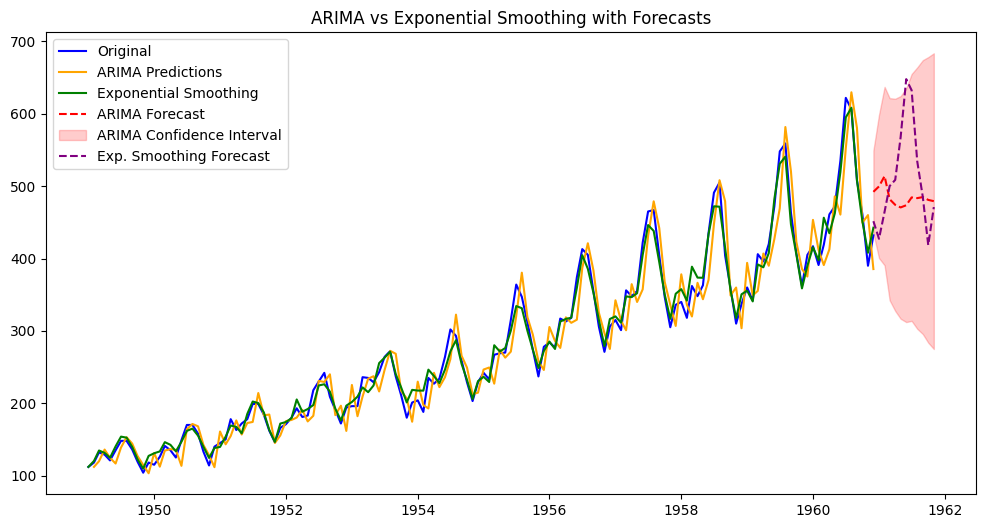

In [7]:
# Step 6: Visualize and compare predictions and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label="Original", color='blue')  # Original data
plt.plot(data['ARIMA_Predictions'], label="ARIMA Predictions", color='orange')  # ARIMA predictions
plt.plot(data['Exp_Smoothing'], label="Exponential Smoothing", color='green')  # Exp. smoothing predictions

# Add ARIMA forecast
plt.plot(forecast_arima_index, forecast_arima_values, label="ARIMA Forecast", color='red', linestyle='dashed')
plt.fill_between(forecast_arima_index, 
                 forecast_arima_ci.iloc[:, 0], 
                 forecast_arima_ci.iloc[:, 1], 
                 color='red', alpha=0.2, label="ARIMA Confidence Interval")

# Add Exponential Smoothing forecast
plt.plot(forecast_arima_index, forecast_exp, label="Exp. Smoothing Forecast", color='purple', linestyle='dashed')

plt.legend()
plt.title("ARIMA vs Exponential Smoothing with Forecasts")
plt.show()

In [8]:
# manually making predictions

# Combine ARIMA and Exponential Smoothing forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_arima_index,
    'ARIMA_Forecast': forecast_arima_values,
    'Exp_Smoothing_Forecast': forecast_exp
}).set_index('Date')

print(f"Forecast range: {forecast_arima_index.min().date()} to {forecast_arima_index.max().date()}")


Forecast range: 1960-12-01 to 1961-11-01


In [9]:
# Function to get the forecast for a specific date
def get_forecast(date):
    date = pd.to_datetime(date)  # Ensure the input is in datetime format
    if date in forecast_df.index:
        result = forecast_df.loc[date]
        return f"Forecast for {date.date()}:\nARIMA: {result['ARIMA_Forecast']:.2f}, Exponential Smoothing: {result['Exp_Smoothing_Forecast']:.2f}"
    else:
        return "Date not in forecast range. Please provide a valid date within the forecast period."




In [ ]:
# Example: Get forecast for a specific date
user_date = input("Enter a date (YYYY-MM-DD) to get the forecast: ")
print(get_forecast(user_date))





### 2. Advanced Time Series Techniques (2 hours 30 minutes)

#### Introduction to Deep Learning in Time Series Forecasting:
- **Why deep learning?** The advantages over traditional methods (handling non-linearity, capturing complex patterns).
- **Overview of deep learning models for time series:** RNN, LSTM, GRU.

#### Long Short-Term Memory (LSTM) Networks for Time Series:
- **What is LSTM?**
  - Recurrent Neural Networks (RNN) and LSTM architecture.
  - LSTM units: Forget, input, and output gates.

- **Data Preparation for LSTM:**
  - Reshaping time series data for LSTM (feature scaling, sequence formatting).
  - Splitting data into training and test sets.

- **Building an LSTM Model in Python:**
  - Using Keras/TensorFlow to build an LSTM model.
  - Hyperparameter tuning (number of layers, units, dropout rate).
  - Loss functions and optimizers (MSE, Adam).

- **Model Evaluation:**
  - Train-test split, cross-validation.
  - Using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) for evaluating performance.

#### Example Project:
- Build an LSTM model to forecast time series data such as stock prices, energy consumption, or weather data.
- Visualize training/validation losses and compare forecasted vs actual values.

#### Activity/Project for Class 2:
- **Hands-on Task:** Build and evaluate an LSTM model on a time series dataset of choice (e.g., sales data, traffic data, or financial data). Make predictions and visualize the results.
- **Discussion:** Compare LSTM predictions to ARIMA and Exponential Smoothing models. Discuss strengths and weaknesses of deep learning-based vs statistical forecasting.

---

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>1. topic 1 
</h3> </div>

xxx

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> sub heading 1
</h4> </div>

content 

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>2. topi
    </h3> </div>

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> sub heading 1
</h4> </div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>3. topi
    </h3> </div>

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> sub heading 1
</h4> </div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>4. topi
    </h3> </div>

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> sub heading 1
</h4> </div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>5. topi
    </h3> </div>

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> sub heading 1
</h4> </div>

<div class="alert alert-block alert-warning">
    <b><font size="5"> Live Exercise</font> </b>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

Now it's your turn!
### Task 1: description of task

    - instructions

<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>_________________________________END________________________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h4> Live Exercise Solutions
        
</h4> </div>

In [ ]:
#solutions

<div class="alert alert-block alert-warning"  padding: 10px; text-align: center;">
    <font size="3"> Programming Interveiw Questions</font>
</div>

1. topic:
    - question

<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->